### Importing all required Libraries

In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

In [3]:
data = '../data/iris.csv'
inputdata = pd.read_csv(data)

In [4]:
print(inputdata.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


## Preprocessing the Dataset
### Clean Data: Find and Mark Missing Values 

In [5]:
#The values are assigned to 0 and then the number of null values in each column is printed using the print function.
inputdata[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= inputdata[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
print (inputdata.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
#The size function is used to return the size, and the groupby function is used to group species. 
#The print function is used to output all of the results.
print(inputdata.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Separate the data into NumPy Arrays for input and output.

In [7]:
#we are using 67% data for training and 33% data for testing.
narray = inputdata.values
X = narray[:,1:5]
Y = narray[:,5]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

In [8]:
m = KNeighborsClassifier()
m.fit(X_train, Y_train)
predicted = m.predict(X_test)
Classificationreport = classification_report(Y_test, predicted)
print("Classification Report: ", "\n", "\n", Classificationreport)

Classification Report:  
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.94      0.83      0.88        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



In [9]:
Final = m.score(X_test, Y_test)
print(("Accuracy: %.3f%%") % (Final*100.0))

Accuracy: 92.000%


### The accuracy of the model built is 92%

### Using K fold Validation to evaluate the model. 

####  Fixing a random seed, in order to achieve the same subsets each time the operation is repeated. The original sample is randomly partitioned into k equal-sized subsamples in k-fold cross-validation. A single subsample from the k subsamples is kept as validation data for testing the model, while the remaining k-1 subsamples are used as training data. The crossvalidation procedure is then performed k times, with each of the k subsamples serving as validation data exactly once.After that, the k results can be averaged to get a single estimate. This method has the benefit of repeated random subsampling in that all observations are used for both training and validation, and each observation is used only once for validation.

In [18]:
splits = 10
seed = 7
kfold = KFold(splits, random_state=seed, shuffle=True)
scoring = 'accuracy'
results = cross_val_score(m, X, Y, cv=kfold, scoring=scoring)
print("Accuracy of the model is: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy of the model is: 0.953 (0.052)


### Finding Optimal K value for this Model. 

In [61]:
k_values = list(range(1,50,5))
cross_validation = []
for K in k_values:
    knn = KNeighborsClassifier(n_neighbors=K)
    accuracy_score = cross_val_score(knn, X_train, Y_train, cv=7, scoring='accuracy')
    cross_validation.append(accuracy_score.mean())
optimal_k = k_values[cross_validation.index(max(cross_validation))]
print(f"our Optimal K value is: {optimal_k}" )

our Optimal K value is: 1


### Plotting k_values to verify optimal K_value

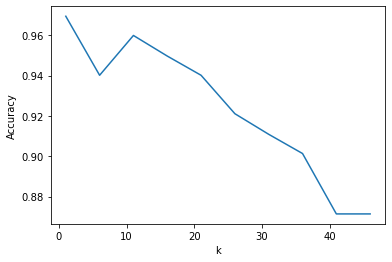

In [62]:
import matplotlib.pyplot as plt 
plt.plot(k_values,cross_validation)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

### The graph confirms the optimal K_value is 1 